In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### can applied to both categorical and numerical form of data 

- we should use only when we believe that data is missing completely at Random (MCAR)

In [7]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [8]:
data_null = [i for i in df.columns if df[i].isnull().mean() > 0]
data_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
df['LotFrontage'].isnull().sum()

259

In [11]:
### finding data types for missing variables

In [15]:
df[data_null].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [19]:
df[data_null].sample(5)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
145,24.0,NaN,Stone,50.0,Gd,TA,No,Unf,Unf,SBrkr,NaN,Detchd,2004.0,Unf,TA,TA,NaN,NaN,NaN
274,76.0,NaN,None,0.0,TA,TA,Gd,ALQ,Unf,SBrkr,NaN,Attchd,1982.0,Unf,TA,TA,NaN,NaN,NaN
490,NaN,NaN,None,0.0,Gd,TA,Mn,Unf,Unf,SBrkr,Gd,BuiltIn,1976.0,Fin,TA,TA,NaN,NaN,NaN
213,43.0,NaN,None,0.0,Gd,TA,No,ALQ,Unf,SBrkr,NaN,Attchd,1996.0,Unf,TA,TA,NaN,NaN,NaN
1297,35.0,NaN,BrkFace,82.0,Gd,TA,Gd,GLQ,Unf,SBrkr,NaN,Basment,2005.0,Fin,TA,TA,NaN,NaN,NaN


In [24]:
df[data_null].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [33]:
a = df[data_null].isnull().mean()
b = pd.DataFrame(a.reset_index())
b.columns = ['variables' , 'missing_percentages']
b.sort_values(by = 'missing_percentages' , ascending = False , inplace = True)
b

,variables,missing_percentages
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


In [34]:
df[data_null].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [57]:
data_less_var = [i for i in df.columns if df[i].isnull().mean() < 0.05]
data_less_var

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [58]:
data_cca = df[data_less_var].dropna()

In [61]:
df[data_less_var].shape

(1460, 70)

In [62]:
data_cca.shape

(1412, 70)

In [64]:
data_cca.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 70, dtype: object

In [65]:
data_cca_num = data_cca.select_dtypes(exclude = 'object')


In [67]:
data_cca_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [68]:
data_cca_num.dtypes

Id                 int64
MSSubClass         int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

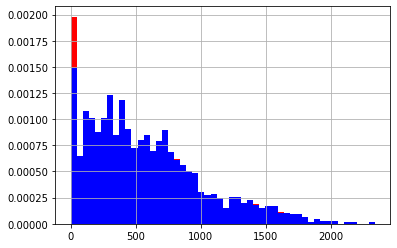

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['BsmtUnfSF'].hist(bins = 50 , ax = ax , color = 'r',density = True)
data_cca_num['BsmtUnfSF'].hist(bins = 50 , ax = ax , color = 'b' , density = True)
plt.show()


In [77]:
### for categorical data columns

In [79]:
data_cca_cat = data_cca.select_dtypes(include = 'object')

In [82]:
data_cca_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [83]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [84]:
data_cca['Street'].value_counts()

Pave    1406
Grvl       6
Name: Street, dtype: int64

In [85]:
def categorical(df , data_cca , var):
    sol = pd.concat([
        df[var].value_counts() / len(df),
        data_cca[var].value_counts() / len(df)
        ] , axis = 1)
    
    sol.columns = ['before_removing' ,'After_removing']
    return sol
    

categorical(df , data_cca , 'Street')

,before_removing,After_removing
Pave,0.99589,0.963014
Grvl,0.00411,0.004110


In [86]:
def categorical(df , data_cca , var):
    sol = pd.concat([
        df[var].value_counts() / len(df),
        data_cca[var].value_counts() / len(df)
        ] , axis = 1)
    
    sol.columns = ['before_removing' ,'After_removing']
    return sol
    

categorical(df , data_cca , 'HouseStyle')

,before_removing,After_removing
1Story,0.497260,0.474658
2Story,0.304795,0.299315
1.5Fin,0.105479,0.102055
SLvl,0.044521,0.043836
SFoyer,0.025342,0.024658
1.5Unf,0.009589,0.009589
2.5Unf,0.007534,0.007534
2.5Fin,0.005479,0.005479


### Mean Median Mode 

In [147]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
len(df)

891

In [150]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [151]:
mean = df['Age'].mean()
mean

29.69911764705882

In [152]:
median = df['Age'].median()
median

28.0

In [153]:
def fun(df,x, var):
    print(x)
    return df[var].fillna(x)

    
    

df['Age_mean'] = fun(df , mean , 'Age')



29.69911764705882


In [154]:
df_1 = df[['Age' , 'Age_mean']]

In [155]:
df_1.head()

,Age,Age_mean
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [158]:
df_1.Age_mean.isnull().sum()

0

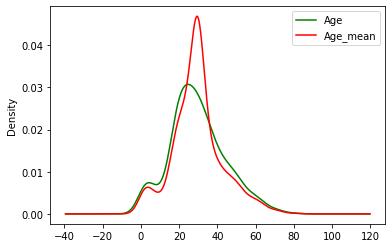

In [159]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].plot(kind ='kde',color = 'g',ax = ax , label = 'Age')
df_1['Age_mean'].plot(kind ='kde',color = 'r',ax = ax , label= 'Age_mean')
plt.legend(loc = 0)
plt.show()

In [160]:
df_1['Age'].std()

14.526497332334042

In [161]:
df_1['Age_mean'].std()

13.002015226002882

<AxesSubplot:>

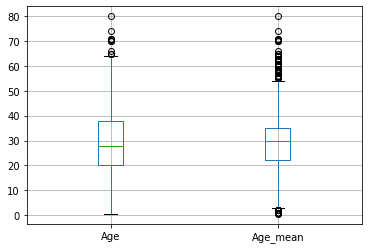

In [162]:
df[['Age','Age_mean']].boxplot()

In [185]:
print("variance of mean before " , df_1['Age'].var())
print("variance of mean After_adding_mean " , df_1['Age_mean'].var())


variance of mean before  211.01912474630802
variance of mean After_adding_mean  169.0523999372108


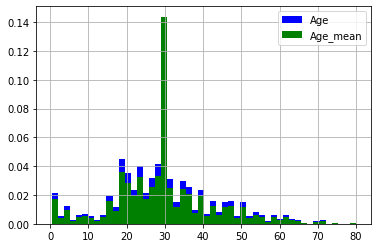

In [169]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].hist(bins = 50,color = 'b',ax = ax , label = 'Age',density = True)
df_1['Age_mean'].hist(bins = 50 , color = 'g',ax = ax , label= 'Age_mean',density = True)
plt.legend(loc = 0)
plt.show()

In [171]:
import warnings
warnings.filterwarnings("ignore")

In [172]:
df_1['Age_median'] = fun(df , median , 'Age')

28.0


In [173]:
df_1.head()

,Age,Age_mean,Age_median
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0


In [174]:
df_1.Age_median.isnull().sum()

0

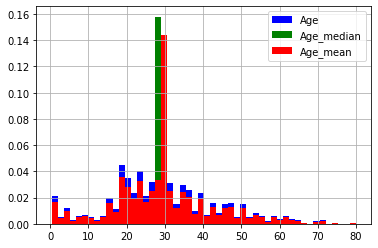

In [179]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].hist(bins = 50,color = 'b',ax = ax , label = 'Age',density = True)
df_1['Age_median'].hist(bins = 50 , color = 'g',ax = ax , label= 'Age_median',density = True)
df_1['Age_mean'].hist(bins = 50 , color = 'r',ax = ax , label= 'Age_mean',density = True)
plt.legend(loc = 0)
plt.show()

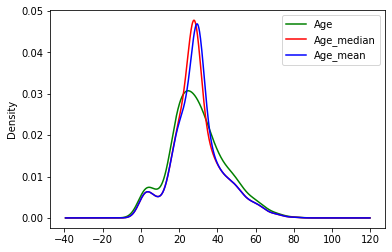

In [180]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].plot(kind ='kde',color = 'g',ax = ax , label = 'Age')
df_1['Age_median'].plot(kind ='kde',color = 'r',ax = ax , label= 'Age_median')
df_1['Age_mean'].plot(kind ='kde',color = 'b',ax = ax , label= 'Age_mean')

plt.legend(loc = 0)
plt.show()

<AxesSubplot:>

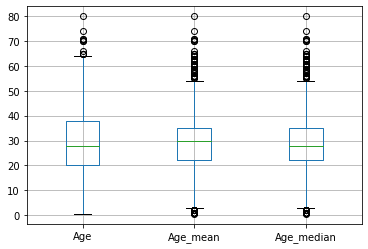

In [183]:
df_1[['Age','Age_mean' , 'Age_median']].boxplot()

In [186]:
print("variance of Age before " , df_1['Age'].var())
print("variance of Age adding mean value " , df_1['Age_mean'].var())
print("variance of Age adding median value " , df_1['Age_median'].var())

variance of Age before  211.01912474630802
variance of Age adding mean value  169.0523999372108
variance of Age adding median value  169.51249827942345


### Arbitary value Imputation

In [207]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [208]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

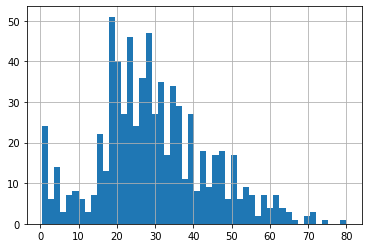

In [209]:
df['Age'].hist(bins = 50)

In [210]:
max = df['Age'].max()
max

80.0

In [211]:
min = df['Age'].min()
min

0.42

In [212]:
df_1 = df[['Age']]

In [213]:
def fun(df,x,var):
    return df[var].fillna(x)
    
df_1['Age_max'] = fun(df,max,'Age')
    


In [214]:
df_1.head()

,Age,Age_max
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [215]:
df_1.isnull().sum()

Age        177
Age_max      0
dtype: int64

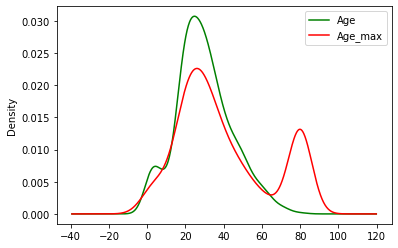

In [216]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].plot(kind ='kde',color = 'g',ax = ax , label = 'Age')
df_1['Age_max'].plot(kind ='kde',color = 'r',ax = ax , label= 'Age_max')
plt.legend(loc = 0)
plt.show()

In [217]:
df_1['Age_min'] = fun(df,min,'Age')

In [218]:
df_1.isnull().sum()

Age        177
Age_max      0
Age_min      0
dtype: int64

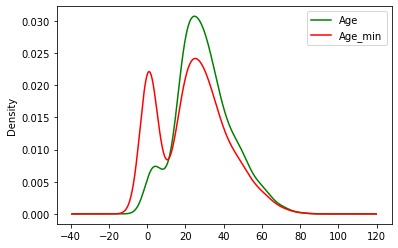

In [219]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].plot(kind ='kde',color = 'g',ax = ax , label = 'Age')
df_1['Age_min'].plot(kind ='kde',color = 'r',ax = ax , label= 'Age_min')
plt.legend(loc = 0)
plt.show()

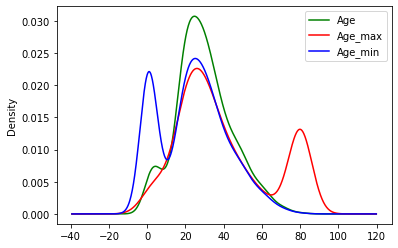

In [220]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].plot(kind ='kde',color = 'g',ax = ax , label = 'Age')
df_1['Age_max'].plot(kind ='kde',color = 'r',ax = ax , label= 'Age_max')
df_1['Age_min'].plot(kind ='kde',color = 'b',ax = ax , label= 'Age_min')
plt.legend(loc = 0)
plt.show()

<AxesSubplot:>

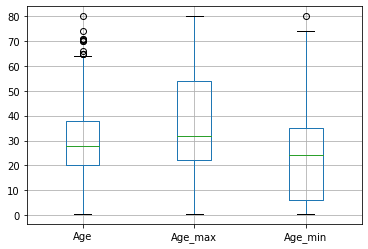

In [221]:
df_1[['Age' , 'Age_max' , 'Age_min']].boxplot()

In [222]:
print("variance of Age before " , df_1['Age'].var())
print("variance of Age adding mean value " , df_1['Age_max'].var())
print("variance of Age adding median value " , df_1['Age_min'].var())

variance of Age before  211.01912474630802
variance of Age adding mean value  572.2843852389059
variance of Age adding median value  305.67411626149135


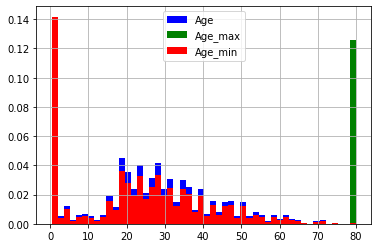

In [223]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].hist(bins = 50,color = 'b',ax = ax , label = 'Age',density = True)
df_1['Age_max'].hist(bins = 50 , color = 'g',ax = ax , label= 'Age_max',density = True)
df_1['Age_min'].hist(bins = 50 , color = 'r',ax = ax , label= 'Age_min',density = True)
plt.legend(loc = 0)
plt.show()

### End of distribution

In [224]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0,D6,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


<AxesSubplot:xlabel='Age', ylabel='Density'>

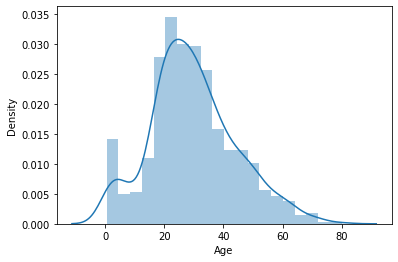

In [225]:
sns.distplot(df['Age'])

<AxesSubplot:>

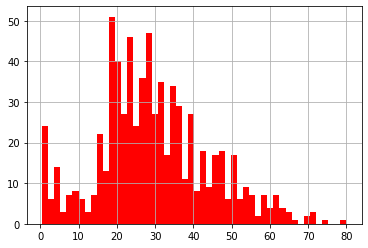

In [226]:
df['Age'].hist(bins = 50 , color = 'r')

In [227]:
df_1 = df[['Age']]

In [231]:
a = df_1['Age'].mean() + 3 * df_1['Age'].std()

In [232]:
a

73.27860964406094

In [233]:
def fun(df_1 , x , var):
    return df_1[var].fillna(x)
    
df_1['Age_std'] = fun(df_1 , a , 'Age')

In [234]:
df_1.head()

,Age,Age_std
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [235]:
df_1.isnull().sum()

Age        177
Age_std      0
dtype: int64

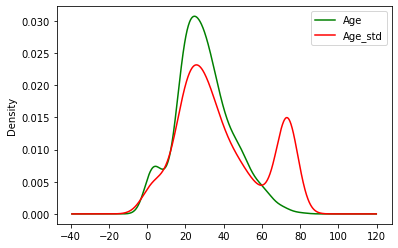

In [236]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].plot(kind ='kde',color = 'g',ax = ax , label = 'Age')
df_1['Age_std'].plot(kind ='kde',color = 'r',ax = ax , label= 'Age_std')
plt.legend(loc = 0)
plt.show()

<AxesSubplot:>

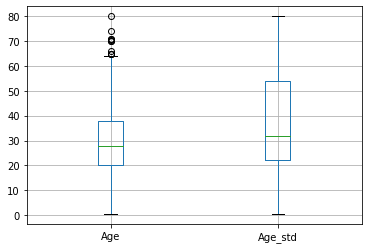

In [237]:
df_1[['Age' , 'Age_std']].boxplot()

In [238]:
print("variance of Age before " , df_1['Age'].var())
print("variance of Age adding std value " , df_1['Age_std'].var())


variance of Age before  211.01912474630802
variance of Age adding std value  471.72150613615423


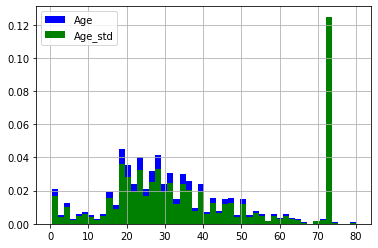

In [241]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df_1['Age'].hist(bins = 50,color = 'b',ax = ax , label = 'Age',density = True)
df_1['Age_std'].hist(bins = 50 , color = 'g',ax = ax , label= 'Age_std',density = True)

plt.legend(loc = 0)
plt.show()

In [243]:
df['Fare'].isnull().sum()

0

<AxesSubplot:xlabel='Fare', ylabel='Density'>

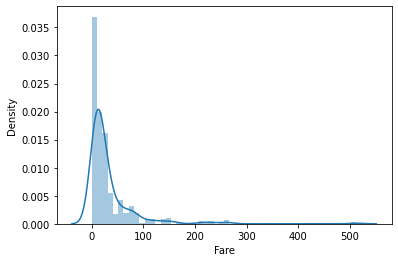

In [242]:
sns.distplot(df['Fare'])

In [276]:
df = pd.read_csv("houseprice.csv" , usecols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])
df.head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [277]:
df.isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

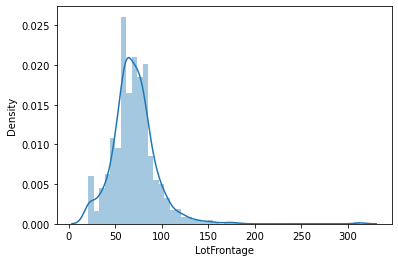

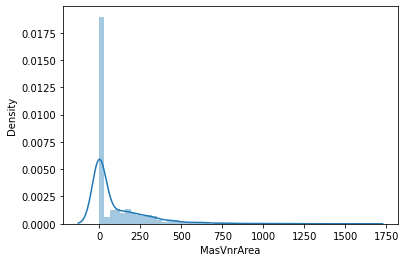

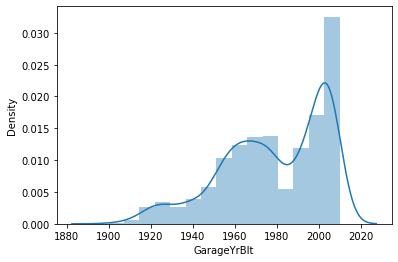

In [278]:
a = df.columns
for i in a:
    sns.distplot(a = df[i])
    plt.show()

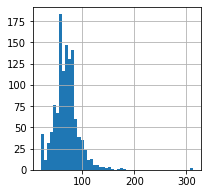

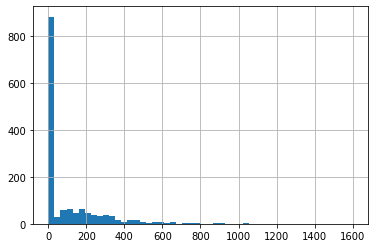

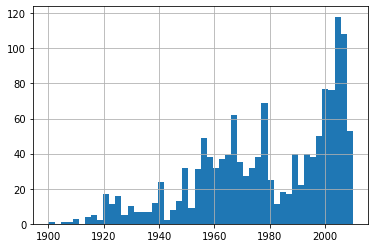

In [279]:
plt.figure(figsize = (3 , 3))
a = df.columns
for i in a:
    df[i].hist(bins = 50)
    plt.show()

In [280]:
df.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [281]:
IQR = df['GarageYrBlt'].quantile(0.75) - df['GarageYrBlt'].quantile(0.25)

In [282]:
IQR

41.0

In [283]:
a = df['GarageYrBlt'].quantile(0.75) + 3 * IQR

In [284]:
def fun(df , a , var):
    return df['GarageYrBlt'].fillna(a)
    
df['GarageYrBlt_replaced'] = fun(df , a , 'GarageYrBlt')

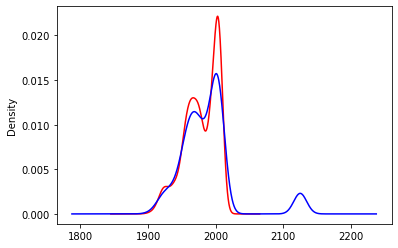

In [285]:
df['GarageYrBlt'].plot(kind = 'kde' , color = 'r' , label = 'GarageYrBlt')
df['GarageYrBlt_replaced'].plot(kind = 'kde' , color = 'b',label = 'GarageYrBlt_replaced')
plt.show()

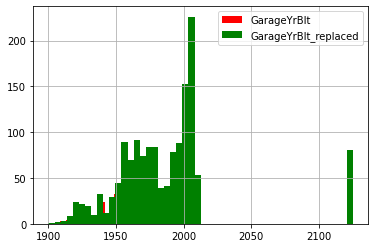

In [286]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['GarageYrBlt'].hist(bins = 50,color = 'r',ax = ax , label = 'GarageYrBlt')
df['GarageYrBlt_replaced'].hist(bins = 50 , color = 'g',ax = ax , label= 'GarageYrBlt_replaced')

plt.legend(loc = 0)
plt.show()

<AxesSubplot:>

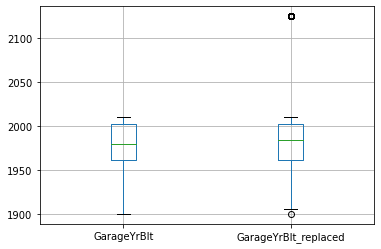

In [287]:
df[['GarageYrBlt','GarageYrBlt_replaced']].boxplot()

In [288]:
print("variance of Age before " , df['GarageYrBlt'].var())
print("variance of Age adding std value " , df['GarageYrBlt_replaced'].var())


variance of Age before  609.5825091487385
variance of Age adding std value  1701.0698803834491


In [289]:
b = df['GarageYrBlt'].quantile(0.25) - 3 * IQR

In [290]:
b 

1838.0

In [291]:
df['GarageYrBlt_0.25'] = fun(df , b , 'GarageYrBlt')

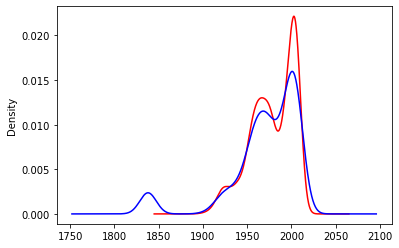

In [292]:
df['GarageYrBlt'].plot(kind = 'kde' , color = 'r' , label = 'GarageYrBlt')
df['GarageYrBlt_0.25'].plot(kind = 'kde' , color = 'b',label = 'GarageYrBlt_0.25')
plt.show()

<AxesSubplot:>

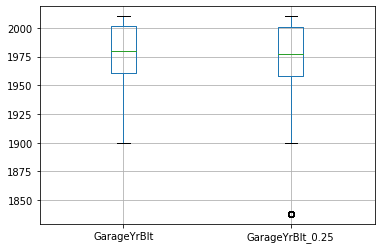

In [293]:
df[['GarageYrBlt','GarageYrBlt_0.25']].boxplot()

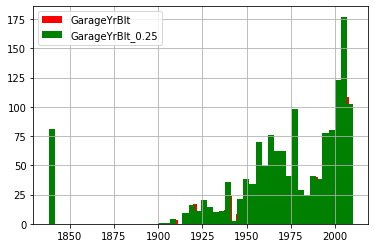

In [294]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
df['GarageYrBlt'].hist(bins = 50,color = 'r',ax = ax , label = 'GarageYrBlt')
df['GarageYrBlt_0.25'].hist(bins = 50 , color = 'g',ax = ax , label= 'GarageYrBlt_0.25')

plt.legend(loc = 0)
plt.show()

In [295]:
print("variance of Age before " , df['GarageYrBlt'].var())
print("variance of Age adding std value " , df['GarageYrBlt_0.25'].var())


variance of Age before  609.5825091487385
variance of Age adding std value  1610.9582074417642


### Frequent category imputation

In [337]:
df = pd.read_csv("houseprice.csv" , usecols = ['BsmtQual', 'FireplaceQu', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [338]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
SalePrice        0
dtype: int64

In [339]:
len(df)

1460

In [340]:
df['BsmtQual'].isnull().mean()

0.025342465753424658

In [341]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [342]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

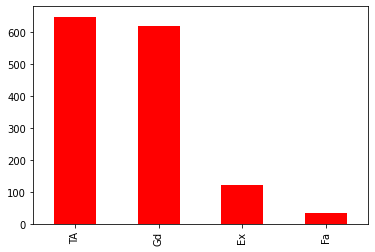

In [343]:
df['BsmtQual'].value_counts().sort_values(ascending = False).plot.bar(color = 'r',orientation = 'vertical' )

In [344]:
df[df['BsmtQual'] == 'TA']['SalePrice'].head()

3     140000
8     129900
9     118000
10    129500
12    144000
Name: SalePrice, dtype: int64

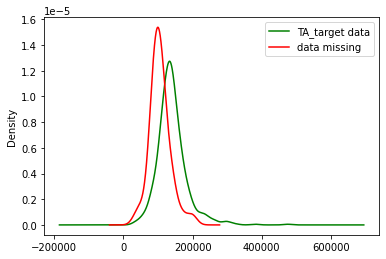

In [345]:
fig = plt.figure()
ax = fig.add_subplot()

df[df['BsmtQual'] == 'TA']['SalePrice'].plot(kind = 'kde' , color = 'g' , ax = ax ,label = 'TA_target data')
df[df['BsmtQual'].isnull()]['SalePrice'].plot(kind = 'kde' , color = 'r' , ax = ax,label = 'data missing')
plt.legend(loc = 0)
plt.show()

In [346]:
mode = df['BsmtQual'].mode()
mode

0    TA
dtype: object

In [347]:
def fun(df , var):
    print(mode)
    return df['BsmtQual'].fillna(mode[0])
    
df['BsmtQual_replaced'] = fun(df , 'BsmtQual')

0    TA
dtype: object


In [348]:
df.head()

,BsmtQual,FireplaceQu,SalePrice,BsmtQual_replaced
0,Gd,NaN,208500,Gd
1,Gd,TA,181500,Gd
2,Gd,TA,223500,Gd
3,TA,Gd,140000,TA
4,Gd,TA,250000,Gd


In [351]:
df['BsmtQual_replaced'].isnull().sum()

0

In [352]:
df['BsmtQual_replaced'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

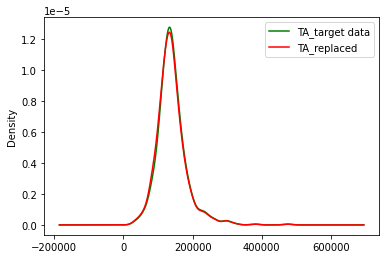

In [353]:
fig = plt.figure()
ax = fig.add_subplot()

df[df['BsmtQual'] == 'TA']['SalePrice'].plot(kind = 'kde' , color = 'g' , ax = ax ,label = 'TA_target data')
df[df['BsmtQual_replaced']=='TA']['SalePrice'].plot(kind = 'kde' , color = 'r' , ax = ax,label = 'TA_replaced')

plt.legend(loc = 0)
plt.show()

In [355]:
df.isnull().sum()

BsmtQual              37
FireplaceQu          690
SalePrice              0
BsmtQual_replaced      0
dtype: int64

In [357]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

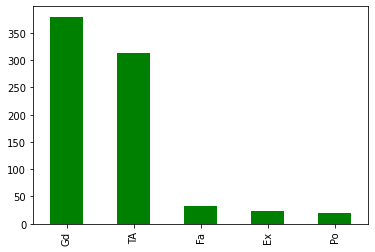

In [358]:
df['FireplaceQu'].value_counts().sort_values(ascending = False).plot.bar(color = 'g')

In [359]:
mode_val = df['FireplaceQu'].mode()

In [361]:
mode_val

0    Gd
dtype: object

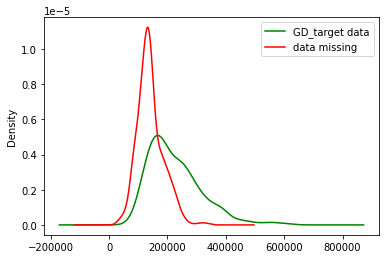

In [362]:
fig = plt.figure()
ax = fig.add_subplot()

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde' , color = 'g' , ax = ax ,label = 'GD_target data')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind = 'kde' , color = 'r' , ax = ax,label = 'data missing')
plt.legend(loc = 0)
plt.show()

In [364]:
def fun(df , x , var):
    return df['FireplaceQu'].fillna(x[0])
    
df['FireplaceQu_replaced'] = fun(df ,mode_val ,'FireplaceQu')

In [366]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [365]:
df['FireplaceQu_replaced'].value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu_replaced, dtype: int64

In [367]:
1070 - 380

690

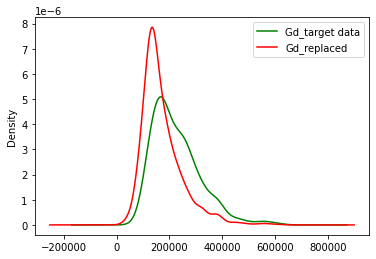

In [368]:
fig = plt.figure()
ax = fig.add_subplot()

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind = 'kde' , color = 'g' , ax = ax ,label = 'Gd_target data')
df[df['FireplaceQu_replaced']=='Gd']['SalePrice'].plot(kind = 'kde' , color = 'r' , ax = ax,label = 'Gd_replaced')

plt.legend(loc = 0)
plt.show()